## Prework - Install packages

In [1]:
!pip install -U pip
!pip install -U setuptools wheel
!pip install -U "mxnet<2.0.0" bokeh==2.0.1
# Without --no-cache-dir, smaller aws instances may have trouble installing
!pip install autogluon --no-cache-dir
!pip install kaggle

---
## Loading the Dataset

#### Success Criteria - Download the Bike Sharing Demand data from Kaggle

In [2]:
!kaggle competitions download -c bike-sharing-demand
!unzip -o bike-sharing-demand.zip

bike-sharing-demand.zip: Skipping, found more recently modified local copy (use --force to force download)
Archive:  bike-sharing-demand.zip
  inflating: sampleSubmission.csv    
  inflating: test.csv                
  inflating: train.csv               


#### Success Criteria - Load all datasets from the Bike Sharing Demand competition into Pandas.

##### Unaltered DF setup

In [3]:
import pandas as pd

train_raw = pd.read_csv("train.csv")
train_raw['datetime'] = pd.to_datetime(train_raw['datetime'])
train_raw.head()

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0,3,13,16
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0,8,32,40
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0,5,27,32
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0,3,10,13
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0,0,1,1


In [4]:
# Simple output of the train dataset to view some of the min/max/varition of the dataset features.
train_raw.describe()

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
count,10886,10886.000000,10886.000000,10886.000000,10886.000000,10886.00000,10886.000000,10886.000000,10886.000000,10886.000000,10886.000000,10886.000000
mean,2011-12-27 05:56:22.399411968,2.506614,0.028569,0.680875,1.418427,20.23086,23.655084,61.886460,12.799395,36.021955,155.552177,191.574132
min,2011-01-01 00:00:00,1.000000,0.000000,0.000000,1.000000,0.82000,0.760000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,2011-07-02 07:15:00,2.000000,0.000000,0.000000,1.000000,13.94000,16.665000,47.000000,7.001500,4.000000,36.000000,42.000000
50%,2012-01-01 20:30:00,3.000000,0.000000,1.000000,1.000000,20.50000,24.240000,62.000000,12.998000,17.000000,118.000000,145.000000
75%,2012-07-01 12:45:00,4.000000,0.000000,1.000000,2.000000,26.24000,31.060000,77.000000,16.997900,49.000000,222.000000,284.000000
max,2012-12-19 23:00:00,4.000000,1.000000,1.000000,4.000000,41.00000,45.455000,100.000000,56.996900,367.000000,886.000000,977.000000
std,NaN,1.116174,0.166599,0.466159,0.633839,7.79159,8.474601,19.245033,8.164537,49.960477,151.039033,181.144454


In [5]:
# Create the test pandas dataframe in pandas by reading the csv, remember to parse the datetime!
test_raw = pd.read_csv("test.csv")
test_raw['datetime'] = pd.to_datetime(test_raw['datetime'])
test_raw.head()

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed
0,2011-01-20 00:00:00,1,0,1,1,10.66,11.365,56,26.0027
1,2011-01-20 01:00:00,1,0,1,1,10.66,13.635,56,0.0000
2,2011-01-20 02:00:00,1,0,1,1,10.66,13.635,56,0.0000
3,2011-01-20 03:00:00,1,0,1,1,10.66,12.880,56,11.0014
4,2011-01-20 04:00:00,1,0,1,1,10.66,12.880,56,11.0014


In [6]:
# Same thing as train and test dataset
submission_raw = pd.read_csv("sampleSubmission.csv")
submission_raw['datetime'] = pd.to_datetime(submission_raw['datetime'])
submission_raw.head()

,datetime,count
0,2011-01-20 00:00:00,0
1,2011-01-20 01:00:00,0
2,2011-01-20 02:00:00,0
3,2011-01-20 03:00:00,0
4,2011-01-20 04:00:00,0


##### Setup DF for categories and hyperparameter tuning

In [7]:
train_categorized = train_raw.copy()
train_tuned = train_raw.copy()

test_categorized = test_raw.copy()
test_tuned = test_raw.copy()

submission_categorized = submission_raw.copy()
submission_tuned = submission_raw.copy()

---
## Feature Creation and Data Analysis

#### Success Criteria - Create a feature and add it to the train and test dataset

In [8]:
train_categorized['month'] = train_categorized['datetime'].dt.month
test_categorized['month'] = test_categorized['datetime'].dt.month

In [9]:
# Also use month feature in tuned dataframe
train_tuned['month'] = train_tuned['datetime'].dt.month
test_tuned['month'] = test_tuned['datetime'].dt.month

#### Success Criteria - Change the datatype of features in the train and test dataset

In [10]:
# season as category
train_categorized["season"] = train_categorized['season'].astype('category')
test_categorized["season"] = test_categorized['season'].astype('category')

# weather as category
train_categorized["weather"] = train_categorized['weather'].astype('category')
test_categorized["weather"] = test_categorized['weather'].astype('category')

In [11]:
# Also use new categories in tuned dataframe
train_tuned["season"] = train_tuned['season'].astype('category')
test_tuned["season"] = test_tuned['season'].astype('category')

train_tuned["weather"] = train_tuned['weather'].astype('category')
test_tuned["weather"] = test_tuned['weather'].astype('category')

#### Success Criteria - Create a histogram of all features in the train dataset

array([[<Axes: title={'center': 'datetime'}>,
        <Axes: title={'center': 'holiday'}>,
        <Axes: title={'center': 'workingday'}>],
       [<Axes: title={'center': 'temp'}>,
        <Axes: title={'center': 'atemp'}>,
        <Axes: title={'center': 'humidity'}>],
       [<Axes: title={'center': 'windspeed'}>,
        <Axes: title={'center': 'casual'}>,
        <Axes: title={'center': 'registered'}>],
       [<Axes: title={'center': 'count'}>,
        <Axes: title={'center': 'month'}>, <Axes: >]], dtype=object)

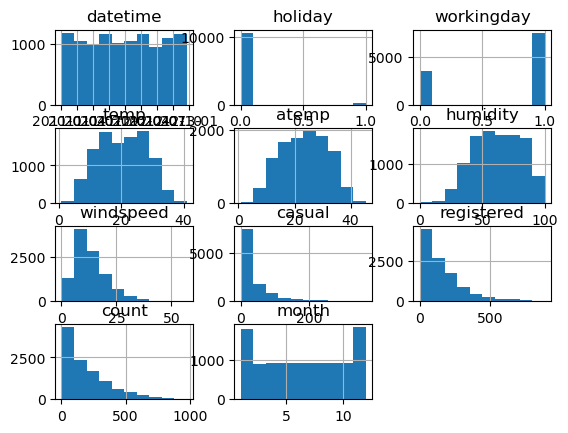

In [12]:
train_categorized.hist()

---
## Model Training With AutoGluon

#### Success Criteria - 
- Train a Tabular Prediction model on the training set
- Change the hyperparameters when training a Tabular Prediction model

#### Raw Training

In [13]:
# Train on the unaltered data
from autogluon.tabular import TabularPredictor

learner_kwargs = {
    'ignored_columns': ['casual','registered']
}

predictor_raw = TabularPredictor(
    label='count',
    problem_type='regression',
    eval_metric="root_mean_squared_error",
    learner_kwargs=learner_kwargs,
).fit(
    train_raw
)

No path specified. Models will be saved in: "AutogluonModels/ag-20240403_215707"
Beginning AutoGluon training ...
AutoGluon will save models to "AutogluonModels/ag-20240403_215707"
AutoGluon Version:  0.8.2
Python Version:     3.10.13
Operating System:   Linux
Platform Machine:   x86_64
Platform Version:   #1 SMP Sat Feb 24 09:50:35 UTC 2024
Disk Space Avail:   9.52 GB / 10.73 GB (88.8%)
	We recommend a minimum available disk space of 10 GB, and large datasets may require more.
Train Data Rows:    10886
Train Data Columns: 11
Label Column: count
Preprocessing data ...
/opt/conda/lib/python3.10/site-packages/autogluon/tabular/learner/default_learner.py:215: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context("mode.use_inf_as_na", True):  # treat None, NaN, INF, NINF as NA
Using Feature Generators to preprocess the data ...
Dropping user-specified ignored columns: ['casual'

[1000]	valid_set's rmse: 136.065


	-135.958	 = Validation score   (-root_mean_squared_error)
	2.46s	 = Training   runtime
	0.1s	 = Validation runtime
Fitting model: LightGBM ...
	-134.0804	 = Validation score   (-root_mean_squared_error)
	0.92s	 = Training   runtime
	0.04s	 = Validation runtime
Fitting model: RandomForestMSE ...
	-122.0128	 = Validation score   (-root_mean_squared_error)
	11.85s	 = Training   runtime
	0.16s	 = Validation runtime
Fitting model: CatBoost ...
	-134.2362	 = Validation score   (-root_mean_squared_error)
	5.69s	 = Training   runtime
	0.0s	 = Validation runtime
Fitting model: ExtraTreesMSE ...
	-128.4294	 = Validation score   (-root_mean_squared_error)
	5.76s	 = Training   runtime
	0.16s	 = Validation runtime
Fitting model: NeuralNetFastAI ...
	-136.4419	 = Validation score   (-root_mean_squared_error)
	10.0s	 = Training   runtime
	0.02s	 = Validation runtime
Fitting model: XGBoost ...
	-135.0751	 = Validation score   (-root_mean_squared_error)
	1.4s	 = Training   runtime
	0.03s	 = Validation

In [14]:
predictions_raw = predictor_raw.predict(test_raw)
predictions_raw.clip(lower=0)
predictions_raw.head()

0    51.861626
1    56.686295
2    59.077763
3    60.468830
4    61.419930
Name: count, dtype: float32

In [15]:
# Describe the `predictions` series to see if there are any negative values
predictions_raw.describe()

count    6493.000000
mean      135.819412
std       132.525269
min         3.424214
25%        23.827692
50%        71.032265
75%       203.938919
max       537.853882
Name: count, dtype: float64

In [17]:
predictor_raw.fit_summary()

*** Summary of fit() ***
Estimated performance of each model:
                  model   score_val  pred_time_val   fit_time  pred_time_val_marginal  fit_time_marginal  stack_level  can_infer  fit_order
0        KNeighborsDist  -92.442085       0.018752   0.021512                0.018752           0.021512            1       True          2
1   WeightedEnsemble_L2  -92.442085       0.019180   0.292729                0.000428           0.271217            2       True         12
2        KNeighborsUnif -109.739422       0.016127   1.556741                0.016127           1.556741            1       True          1
3       RandomForestMSE -122.012844       0.156873  11.854465                0.156873          11.854465            1       True          5
4         ExtraTreesMSE -128.429416       0.159019   5.760966                0.159019           5.760966            1       True          7
5         LightGBMLarge -132.173561       0.023007   1.208040                0.023007           1.

/opt/conda/lib/python3.10/site-packages/autogluon/core/utils/plots.py:169: UserWarning: AutoGluon summary plots cannot be created because bokeh is not installed. To see plots, please do: "pip install bokeh==2.0.1"
  warnings.warn('AutoGluon summary plots cannot be created because bokeh is not installed. To see plots, please do: "pip install bokeh==2.0.1"')


{'model_types': {'KNeighborsUnif': 'KNNModel',
  'KNeighborsDist': 'KNNModel',
  'LightGBMXT': 'LGBModel',
  'LightGBM': 'LGBModel',
  'RandomForestMSE': 'RFModel',
  'CatBoost': 'CatBoostModel',
  'ExtraTreesMSE': 'XTModel',
  'NeuralNetFastAI': 'NNFastAiTabularModel',
  'XGBoost': 'XGBoostModel',
  'NeuralNetTorch': 'TabularNeuralNetTorchModel',
  'LightGBMLarge': 'LGBModel',
  'WeightedEnsemble_L2': 'WeightedEnsembleModel'},
 'model_performance': {'KNeighborsUnif': -109.73942190555698,
  'KNeighborsDist': -92.44208479870365,
  'LightGBMXT': -135.95803375936984,
  'LightGBM': -134.0804268849742,
  'RandomForestMSE': -122.01284447953923,
  'CatBoost': -134.23616330181272,
  'ExtraTreesMSE': -128.42941608551303,
  'NeuralNetFastAI': -136.44185176024817,
  'XGBoost': -135.0750870521187,
  'NeuralNetTorch': -140.02270087878156,
  'LightGBMLarge': -132.1735605846617,
  'WeightedEnsemble_L2': -92.44208479870365},
 'model_best': 'WeightedEnsemble_L2',
 'model_paths': {'KNeighborsUnif': ['KN

In [18]:
submission_raw["count"] = predictions_raw
submission_raw.to_csv("submission_raw.csv", index=False)
!kaggle competitions submit -c bike-sharing-demand -f submission_raw.csv -m "unaltered submission"

100%|█████████████████████████████████████████| 188k/188k [00:00<00:00, 281kB/s]
Successfully submitted to Bike Sharing Demand

#### Features and Categories Training

In [19]:
# Train on the added features and categories
from autogluon.tabular import TabularPredictor

learner_kwargs = {
    'ignored_columns': ['casual','registered']
}

predictor_categorized = TabularPredictor(
    label='count',
    problem_type='regression',
    eval_metric="root_mean_squared_error",
    learner_kwargs=learner_kwargs,
).fit(
    train_categorized
)

No path specified. Models will be saved in: "AutogluonModels/ag-20240403_220109"
Beginning AutoGluon training ...
AutoGluon will save models to "AutogluonModels/ag-20240403_220109"
AutoGluon Version:  0.8.2
Python Version:     3.10.13
Operating System:   Linux
Platform Machine:   x86_64
Platform Version:   #1 SMP Sat Feb 24 09:50:35 UTC 2024
Disk Space Avail:   8.98 GB / 10.73 GB (83.7%)
	We recommend a minimum available disk space of 10 GB, and large datasets may require more.
Train Data Rows:    10886
Train Data Columns: 12
Label Column: count
Preprocessing data ...
/opt/conda/lib/python3.10/site-packages/autogluon/tabular/learner/default_learner.py:215: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context("mode.use_inf_as_na", True):  # treat None, NaN, INF, NINF as NA
Using Feature Generators to preprocess the data ...
Dropping user-specified ignored columns: ['casual'

[1000]	valid_set's rmse: 134.945
[2000]	valid_set's rmse: 134.294
[3000]	valid_set's rmse: 134.24


	-134.1471	 = Validation score   (-root_mean_squared_error)
	3.77s	 = Training   runtime
	0.36s	 = Validation runtime
Fitting model: LightGBM ...
	-134.1557	 = Validation score   (-root_mean_squared_error)
	0.78s	 = Training   runtime
	0.03s	 = Validation runtime
Fitting model: RandomForestMSE ...
	-122.1785	 = Validation score   (-root_mean_squared_error)
	11.84s	 = Training   runtime
	0.15s	 = Validation runtime
Fitting model: CatBoost ...
	-134.841	 = Validation score   (-root_mean_squared_error)
	21.34s	 = Training   runtime
	0.01s	 = Validation runtime
Fitting model: ExtraTreesMSE ...
	-128.6409	 = Validation score   (-root_mean_squared_error)
	5.7s	 = Training   runtime
	0.16s	 = Validation runtime
Fitting model: NeuralNetFastAI ...
	-137.4369	 = Validation score   (-root_mean_squared_error)
	10.54s	 = Training   runtime
	0.02s	 = Validation runtime
Fitting model: XGBoost ...
	-135.2594	 = Validation score   (-root_mean_squared_error)
	1.46s	 = Training   runtime
	0.03s	 = Valida

In [22]:
predictions_categorized = predictor_categorized.predict(test_categorized)
predictions_categorized.clip(lower=0)
predictions_categorized.head()

0    51.861626
1    56.686295
2    59.077763
3    60.468830
4    61.419930
Name: count, dtype: float32

In [23]:
# Describe the `predictions` series to see if there are any negative values
predictions_categorized.describe()

count    6493.000000
mean      135.819412
std       132.525269
min         3.424214
25%        23.827692
50%        71.032265
75%       203.938919
max       537.853882
Name: count, dtype: float64

In [24]:
predictor_categorized.fit_summary()

*** Summary of fit() ***
Estimated performance of each model:
                  model   score_val  pred_time_val   fit_time  pred_time_val_marginal  fit_time_marginal  stack_level  can_infer  fit_order
0        KNeighborsDist  -92.442085       0.015008   0.018442                0.015008           0.018442            1       True          2
1   WeightedEnsemble_L2  -92.442085       0.015423   0.291830                0.000415           0.273388            2       True         12
2        KNeighborsUnif -109.739422       0.015168   0.018136                0.015168           0.018136            1       True          1
3       RandomForestMSE -122.178458       0.147868  11.842559                0.147868          11.842559            1       True          5
4         ExtraTreesMSE -128.640944       0.158628   5.700039                0.158628           5.700039            1       True          7
5         LightGBMLarge -132.128127       0.037295   1.466581                0.037295           1.

/opt/conda/lib/python3.10/site-packages/autogluon/core/utils/plots.py:169: UserWarning: AutoGluon summary plots cannot be created because bokeh is not installed. To see plots, please do: "pip install bokeh==2.0.1"
  warnings.warn('AutoGluon summary plots cannot be created because bokeh is not installed. To see plots, please do: "pip install bokeh==2.0.1"')


{'model_types': {'KNeighborsUnif': 'KNNModel',
  'KNeighborsDist': 'KNNModel',
  'LightGBMXT': 'LGBModel',
  'LightGBM': 'LGBModel',
  'RandomForestMSE': 'RFModel',
  'CatBoost': 'CatBoostModel',
  'ExtraTreesMSE': 'XTModel',
  'NeuralNetFastAI': 'NNFastAiTabularModel',
  'XGBoost': 'XGBoostModel',
  'NeuralNetTorch': 'TabularNeuralNetTorchModel',
  'LightGBMLarge': 'LGBModel',
  'WeightedEnsemble_L2': 'WeightedEnsembleModel'},
 'model_performance': {'KNeighborsUnif': -109.73942190555698,
  'KNeighborsDist': -92.44208479870365,
  'LightGBMXT': -134.1471174836755,
  'LightGBM': -134.15572607104932,
  'RandomForestMSE': -122.17845826318135,
  'CatBoost': -134.84102979059256,
  'ExtraTreesMSE': -128.64094392540997,
  'NeuralNetFastAI': -137.43688635391138,
  'XGBoost': -135.25938782614733,
  'NeuralNetTorch': -140.0974267079335,
  'LightGBMLarge': -132.12812664449197,
  'WeightedEnsemble_L2': -92.44208479870365},
 'model_best': 'WeightedEnsemble_L2',
 'model_paths': {'KNeighborsUnif': ['K

In [25]:
submission_categorized["count"] = predictions_categorized
submission_categorized.to_csv("submission_categorized.csv", index=False)
!kaggle competitions submit -c bike-sharing-demand -f submission_categorized.csv -m "submission with additional features and categoriation"

100%|█████████████████████████████████████████| 188k/188k [00:00<00:00, 345kB/s]
Successfully submitted to Bike Sharing Demand

#### Tuned Training

In [ ]:
# Train on the features/categories and additional hyperparameters
from autogluon.tabular import TabularPredictor

learner_kwargs = {
    'ignored_columns': ['casual','registered']
}

predictor_tuned = TabularPredictor(
    label='count',
    problem_type='regression',
    eval_metric="root_mean_squared_error",
    learner_kwargs=learner_kwargs,
).fit(
    train_tuned,
    presets='best_quality',
    time_limit=300
)

No path specified. Models will be saved in: "AutogluonModels/ag-20240403_220313"
Presets specified: ['best_quality']
Stack configuration (auto_stack=True): num_stack_levels=1, num_bag_folds=8, num_bag_sets=20
Beginning AutoGluon training ... Time limit = 300s
AutoGluon will save models to "AutogluonModels/ag-20240403_220313"
AutoGluon Version:  0.8.2
Python Version:     3.10.13
Operating System:   Linux
Platform Machine:   x86_64
Platform Version:   #1 SMP Sat Feb 24 09:50:35 UTC 2024
Disk Space Avail:   8.43 GB / 10.73 GB (78.5%)
	We recommend a minimum available disk space of 10 GB, and large datasets may require more.
Train Data Rows:    10886
Train Data Columns: 12
Label Column: count
Preprocessing data ...
/opt/conda/lib/python3.10/site-packages/autogluon/tabular/learner/default_learner.py:215: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context("mode.use_inf_as_na",

#### Success Criteria - Make predictions with a trained model on a test data set

In [ ]:
predictions_tuned = predictor_tuned.predict(test_tuned)
predictions_tuned.clip(lower=0)
predictions_tuned.head()

In [ ]:
# Describe the `predictions` series to see if there are any negative values
predictions_tuned.describe()

In [ ]:
predictor_tuned.fit_summary()

In [ ]:
submission_tuned["count"] = predictions_tuned
submission_tuned.to_csv("submission_raw.csv", index=False)
!kaggle competitions submit -c bike-sharing-demand -f submission_tuned.csv -m "submission with additional features, categoriation and hp tuning"

---
## Compare Model Performance

#### Success Criteria - Submit a prediction submission from a model to Kaggle for scoring
- see above

#### Success Criteria - Graph changes of their model evaluation metric after each model iteration
- see above

#### Success Criteria - Graph changes to their Kaggle competition score after each model iteration

In [ ]:
!kaggle competitions submissions -c bike-sharing-demand | tail -n +1 | head -n 3

In [ ]:
fig = pd.DataFrame(
    {
        "test_eval": ["raw", "categorized", "tuned"],
        "score": [1.86412, 1.86412, 1.83688]
    }
).plot(x="test_eval", y="score", figsize=(8, 6)).get_figure()
fig.savefig('model_test_score.png')